# Dataset

| Column Name        | Data Type | Description |
|--------------------|----------|-------------|
| gradyear           | int64    | Tahun kelulusan siswa dari sekolah menengah |
| gender             | object   | Jenis kelamin siswa (M = Male, F = Female |
| NumberOffriends    | int64    | Jumlah teman/kontak siswa di media sosial |
| basketball         | int64    | Frekuensi penyebutan atau ketertarikan pada basket di profil siswa |
| football           | int64    | Frekuensi penyebutan atau ketertarikan pada football di profil siswa |
| soccer             | int64    | Frekuensi penyebutan atau ketertarikan pada soccer di profil siswa |
| softball           | int64    | Frekuensi penyebutan atau ketertarikan pada softball di profil siswa |
| volleyball         | int64    | Frekuensi penyebutan atau ketertarikan pada volleyball di profil siswa |
| swimming           | int64    | Frekuensi penyebutan atau ketertarikan pada swimming di profil siswa |
| cheerleading       | int64    | Frekuensi penyebutan atau ketertarikan pada cheerleading di profil siswa |
| baseball           | int64    | Frekuensi penyebutan atau ketertarikan pada baseball di profil siswa |
| tennis             | int64    | Frekuensi penyebutan atau ketertarikan pada tennis di profil siswa |
| sports             | int64    | Total atau agregasi minat di bidang olahraga |
| dance              | int64    | Frekuensi penyebutan atau ketertarikan pada dance |
| band               | int64    | Frekuensi penyebutan atau ketertarikan pada band/musik kelompok |
| marching           | int64    | Frekuensi penyebutan atau ketertarikan pada marching band |
| music              | int64    | Frekuensi penyebutan atau ketertarikan pada musik secara umum |
| rock               | int64    | Frekuensi penyebutan atau ketertarikan pada musik rock |
| hair               | int64    | Frekuensi penyebutan atau ketertarikan pada topik rambut/penampilan |
| dress              | int64    | Frekuensi penyebutan atau ketertarikan pada pakaian/fashion |
| blonde             | int64    | Frekuensi penyebutan kata "blonde" dalam profil siswa |


# Import Data

# Library yang digunakan

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import kstest
import math
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [47]:
df = pd.read_csv('students_social_network_profile.csv')

# Data Exploration

## Menampilkan data

**`df.head()`** menampilkan beberapa baris teratas atau pertama dari dataset

In [48]:
df.head()

,gradyear,gender,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,tennis,sports,dance,band,marching,music,rock,hair,dress,blonde
0,2007,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,49,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2007,F,41,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,4,0,0
3,2006,F,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,1,0,0,0,0,0,1,0,...,3,0,0,0,0,1,0,5,0,0


**`df.info()`** memberikan ringkasan struktur DataFrame, termasuk jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori, membantu memahami data sebelum analisis.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   NumberOffriends  15000 non-null  int64 
 3   basketball       15000 non-null  int64 
 4   football         15000 non-null  int64 
 5   soccer           15000 non-null  int64 
 6   softball         15000 non-null  int64 
 7   volleyball       15000 non-null  int64 
 8   swimming         15000 non-null  int64 
 9   cheerleading     15000 non-null  int64 
 10  baseball         15000 non-null  int64 
 11  tennis           15000 non-null  int64 
 12  sports           15000 non-null  int64 
 13  dance            15000 non-null  int64 
 14  band             15000 non-null  int64 
 15  marching         15000 non-null  int64 
 16  music            15000 non-null  int64 
 17  rock             15000 non-null

Pada dataset ini terdapat 15.000 data dengan 21 kolom. Memiliki 20 kolom dengan tipe data numerik atau int, 1 kolom dengan tipe data kategorikal atau object

## Menampilkan ringkasan statistik

In [50]:
df.describe(include=['int64', 'float64'])

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,dance,band,marching,music,rock,hair,dress,blonde
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,0.08820,0.143667,0.430867,0.301933,0.042133,0.732933,0.245867,0.431200,0.116467,0.112867
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,0.53032,0.476209,1.167495,1.075692,0.297261,1.194475,0.742150,1.089287,0.461862,2.708619
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,15.00000,12.000000,29.000000,27.000000,9.000000,23.000000,18.000000,21.000000,7.000000,327.000000


Dari hasil ringkasan statistik pada data ini :
- Data ini mencakup siswa yang lulus pada tahun 2006 sampai 2009.
- Rata-rata jumlah teman dalam dataset ini adalah 29 teman per siswa.
- Jumlah teman terbanyak adalah 605 teman, sedangkan yang paling sedikit adalah 0 teman. Hal ini menunjukkan adanya perbedaan yang cukup besar antara siswa yang sangat populer dan yang memiliki sedikit teman.
- Mayoritas siswa tidak menyebutkan hobi olahraga di profil mereka. Hanya sebagian kecil siswa yang menyebutkan hobi tersebut beberapa kali.
- Minat yang paling sering disebut adalah music dengan rata-rata 0,73, diikuti oleh dance dengan rata-rata 0,43, dan band dengan rata-rata 0,30.
- Secara umum, minat yang berkaitan dengan hiburan dan musik lebih sering disebutkan dibandingkan minat lainnya seperti olahraga.
- Sebagian besar siswa tidak menuliskan minat secara aktif di profil mereka. Hal ini terlihat dari nilai rata-rata yang kecil dan nilai kuartil (Q1, median, dan Q3) yang sebagian besar bernilai 0, yang berarti lebih dari setengah siswa tidak menyebutkan minat tersebut sama sekali.

## Distribusi Data

- Dilakukan pemeriksaan distribusi data untuk mengetahui pola sebaran nilai pada setiap variabel.
- Pemeriksaan ini bertujuan untuk melihat apakah data berdistribusi normal atau tidak, sehingga dapat ditentukan metode analisis yang sesuai pada tahap selanjutnya.
- Pemriksaan persebaran data menggunakan Uji Kolmogorov–Smirnov karena jumlah data > 5000

In [51]:
# Standarisasi data
friends_z  = (df['NumberOffriends'] - df['NumberOffriends'].mean()) / df['NumberOffriends'].std()

# Uji Kolmogorov-Smirnov
stat_f, p_f = kstest(friends_z, 'norm')


# Hasil uji mber of Friends
print("Number of Friends")
print(f"  Statistik uji : {stat_f:.4f}")
print(f"  p-value      : {p_f:.6f}")
if p_f > 0.05:
    print("  Data berdistribusi normal\n")
else:
    print("  Data tidak berdistribusi normal\n")


Number of Friends
  Statistik uji : 0.1996
  p-value      : 0.000000
  Data tidak berdistribusi normal



Distribusi `NumberOffriends` tidak normal karena kondisi ini wajar terjadi karena dalam media sosial setiap individu memiliki jumlah teman yang berbeda-beda. Ada siswa yang memiliki banyak teman, ada yang memiliki sedikit teman, bahkan ada yang tidak memiliki teman sama sekali.

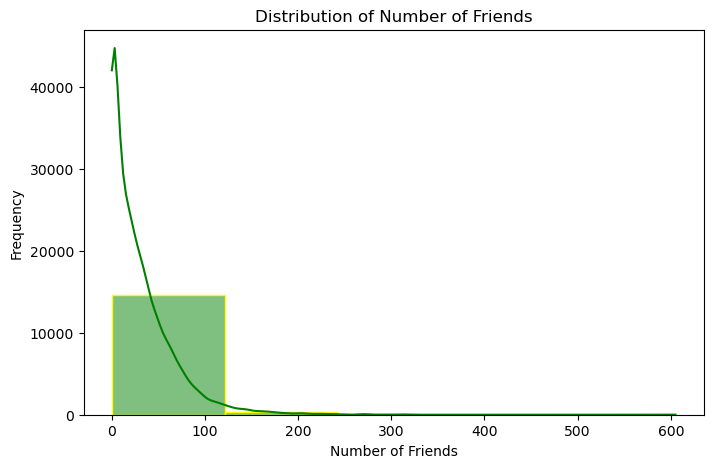

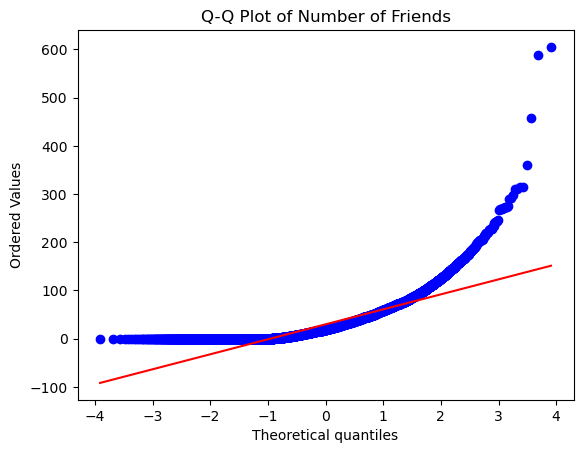

In [52]:
# Histogram Number of Friends
plt.figure(figsize=(8,5)) # Mengatur ukuran figure
sns.histplot(df['NumberOffriends'], bins=5, kde=True, color='green', edgecolor='yellow') # bins = 5 artinya membagi number of friend menjadi 5 interval
plt.xlabel('Number of Friends') # Label sumbu X
plt.ylabel('Frequency') # Label sumbu Y
plt.title('Distribution of Number of Friends') # Judul histogram
plt.show()  # Menampilkan histogram

# Q-Q Plot Number of Friends
probplot(df["NumberOffriends"], dist="norm", plot=plt) # Membandingkan distribusi number of friends dengan distribusi normal
plt.title("Q-Q Plot of Number of Friends") # Judul Q-Q plot
plt.show() # Menampilkan Q-Q plot


## Memeriksa data kosong

In [53]:
pd.isnull(df).sum()

gradyear              0
gender             1337
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
hair                  0
dress                 0
blonde                0
dtype: int64

In [54]:
missing_percent = df.isnull().mean() * 100
missing_percent

gradyear           0.000000
gender             8.913333
NumberOffriends    0.000000
basketball         0.000000
football           0.000000
soccer             0.000000
softball           0.000000
volleyball         0.000000
swimming           0.000000
cheerleading       0.000000
baseball           0.000000
tennis             0.000000
sports             0.000000
dance              0.000000
band               0.000000
marching           0.000000
music              0.000000
rock               0.000000
hair               0.000000
dress              0.000000
blonde             0.000000
dtype: float64

Terdapat missing value pada kolom `gender` memiliki missing value sebanyak 8.91%

## Memeriksa data duplikasi

In [55]:
df.duplicated().sum()

np.int64(2953)

Pada data ini memiliki 2953 data yang sama

In [56]:
# Menampilkan semua baris yang terdeteksi sebagai duplikat
duplicates = df[df.duplicated(keep=False)]

# Lihat beberapa baris pertama
duplicates

,gradyear,gender,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,tennis,sports,dance,band,marching,music,rock,hair,dress,blonde
0,2007,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006,F,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,M,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2006,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,2006,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14992,2007,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14993,2007,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14994,2008,F,48,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Data Cleaning

Membuat data frame baru salinan dari df agar ketika digunakan untuk analisis tidak merusak data asli

In [57]:
df_clean = df.copy()

## Menangani missing values

Terdapat missing value pada kolom `gender` memiliki missing value sebanyak 8.91% atau 1337 dari 15.000 data. jumlah missing value berada diantara 5% - 20%, dengan mempertimbangkan konteks, lebih baik diimputasi atau mengganti nilai

In [58]:
# Menangani missing value pada kolom 'gender'
df_clean['gender'] = df_clean['gender'].fillna('Unknown')

## Menangani duplikat data

Pada tahap ini dilakukan pemeriksaan terhadap data duplikat untuk memastikan tidak terdapat pengulangan data yang dapat mempengaruhi hasil analisis. 
Karena dataset tidak memiliki `user_id`, pemeriksaan duplikat dilakukan berdasarkan seluruh kolom yang tersedia. Dalam konteks data sosial, data duplikasi bisa saja bukan karena kesalahan, karena dua atau lebih siswa yang berbeda memungkinkan memiliki angkatan, gender, jumlah teman, dan minat yang sama sehingga menghasilkan profil yang terlihat identik.
Oleh karena itu, pada tahap awal dataset asli tetap dipertahankan. Selanjutnya, analisis dilakukan dalam dua skenario, yaitu:
1. Menggunakan data asli
2. Menggunakan data setelah penghapusan duplikat

Tujuannya adalah untuk melihat apakah data duplikat memberikan pengaruh signifikan terhadap hasil analisis.

Skenario 1

In [59]:
df.duplicated().sum()

np.int64(2953)

Pada data ini memiliki 2953 data yang sama

Skenario 2

Membuat dataframe baru untuk menguji 2 skenario

Menghapus duplikat data

In [60]:
# Menghapus data duplikat
df_clean.drop_duplicates(inplace=True)

# Cek jumlah data setelah drop
print("Jumlah data setelah drop:", len(df_clean))

Jumlah data setelah drop: 12047


In [62]:
df_clean.duplicated().sum()

np.int64(0)

Menampilkan ringkasan statistik

In [63]:
df_clean.describe(include=['int64', 'float64'])

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,dance,band,marching,music,rock,hair,dress,blonde
count,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000,12047.000000
mean,2007.548435,34.310534,0.329626,0.315846,0.275089,0.197975,0.177223,0.164854,0.130074,0.128912,0.108907,0.176641,0.525608,0.371213,0.052046,0.852494,0.298830,0.525691,0.143355,0.140201
std,1.112525,37.155215,0.866771,0.770061,1.018929,0.817724,0.707906,0.605923,0.556845,0.575584,0.589007,0.523728,1.279665,1.187472,0.330322,1.280931,0.815049,1.190260,0.509858,3.021757
min,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.000000,17.000000,14.000000,31.000000,8.000000,14.000000,15.000000,12.000000,29.000000,27.000000,9.000000,23.000000,18.000000,21.000000,7.000000,327.000000


Hasil ringkasan statistik :
- Jumlah data setelah penghapusan duplikat menjadi 12.047 siswa (berkurang sekitar 19,7% dari data original)
- Data tetap mencakup siswa lulusan tahun 2006 sampai 2009
- Rata-rata jumlah teman meningkat menjadi 34 teman per siswa (sebelumnya 29 teman)
- Median jumlah teman meningkat menjadi 24 teman, menunjukkan bahwa secara umum siswa dalam dataset ini memiliki jumlah teman yang lebih tinggi dibandingkan sebelum penghapusan duplikat
- Jumlah teman terbanyak tetap 605 teman, dan yang paling sedikit tetap 0 teman, sehingga variasi antar siswa masih cukup besar
- Rata-rata minat siswa meningkat pada hampir semua variabel dibandingkan sebelum penghapusan duplikat
- Minat yang paling sering disebut tetap music (mean = 0,85), diikuti oleh dance (mean = 0,52) dan band (mean = 0,37)
- Minat yang berkaitan dengan hiburan dan musik tetap lebih dominan dibandingkan minat olahraga

Kesimpulan :
- Ditemukan sebanyak 2.953 data duplikat atau sekitar 19,7% dari total dataset
- Setelah dilakukan perbandingan antara data sebelum dan sesudah penghapusan duplikat, terdapat perbedaan yang cukup signifikan pada nilai rata-rata dan distribusi jumlah teman serta penyebutan minat
- Rata-rata jumlah teman meningkat dari 29 menjadi 34 teman per siswa setelah penghapusan duplikat, yang menunjukkan bahwa data duplikat mempengaruhi hasil statistik deskriptif
- Rata-rata penyebutan minat juga mengalami peningkatan, yang menunjukkan bahwa duplikasi data sebelumnya menurunkan representasi aktivitas minat siswa

Berdasarkan perbandingan tersebut, disimpulkan bahwa data duplikat memberikan dampak terhadap hasil analisis. Oleh karena itu, analisis selanjutnya akan menggunakan dataset yang telah dihapus duplikatnya agar hasil yang diperoleh lebih representatif dan tidak bias.

## Memeriksa konsistensi data

In [64]:
# Mengatur agar isi kolom (terutama list unique values) tidak terpotong saat ditampilkan
pd.set_option('display.max_colwidth', None)

# Membuat list kosong untuk menampung informasi setiap kolom
list_info = []

# Melakukan iterasi pada setiap kolom di dataframe
for col in df_clean.columns:
    list_info.append([
        col,                                # Nama kolom
        df_clean[col].dtype,                 # Tipe data kolom
        df_clean[col].nunique(),             # Jumlah nilai unik pada kolom
        list(df_clean[col].unique())         # Daftar seluruh nilai unik pada kolom
    ])

# Mengubah list menjadi DataFrame agar lebih mudah dibaca
df_info = pd.DataFrame(
    columns=['column', 'dtype', 'n_unique', 'unique_values'], 
    data=list_info
)

# Menampilkan ringkasan informasi kolom
display(df_info)

,column,dtype,n_unique,unique_values
0,gradyear,int64,4,"[2007, 2006, 2008, 2009]"
1,gender,object,3,"[Unknown, F, M]"
2,NumberOffriends,int64,236,"[0, 49, 41, 36, 1, 32, 18, 21, 29, 89, 37, 98, 10, 48, 86, 93, 64, 12, 85, 16, 66, 15, 17, 39, 61, 92, 162, 70, 28, 56, 14, 22, 83, 8, 97, 138, 2, 72, 5, 24, 38, 31, 76, 13, 55, 9, 20, 26, 67, 143, 6, 3, 127, 141, 104, 23, 242, 19, 73, 57, 129, 87, 54, 53, 25, 84, 11, 4, 75, 112, 40, 96, 46, 7, 35, 77, 144, 153, 81, 63, 51, 62, 27, 34, 68, 50, 42, 79, 59, 52, 43, 30, 47, 58, 44, 60, 33, 588, 82, 45, ...]"
3,basketball,int64,13,"[0, 1, 2, 4, 3, 6, 8, 5, 7, 22, 12, 10, 9]"
4,football,int64,10,"[0, 5, 1, 2, 3, 4, 7, 8, 6, 9]"
5,soccer,int64,17,"[0, 1, 2, 5, 4, 7, 3, 6, 11, 8, 10, 9, 14, 12, 22, 16, 15]"
6,softball,int64,16,"[0, 8, 5, 1, 2, 3, 4, 7, 6, 10, 12, 9, 14, 11, 13, 17]"
7,volleyball,int64,13,"[0, 3, 2, 1, 4, 5, 7, 9, 6, 11, 8, 14, 10]"
8,swimming,int64,11,"[0, 1, 2, 3, 12, 7, 5, 4, 6, 8, 31]"
9,cheerleading,int64,9,"[0, 1, 2, 6, 3, 4, 5, 8, 7]"


## Deteksi outlier menggunakan IQR

In [69]:
# Pilih semua kolom dengan tipe data integer
int_cols = df_clean.select_dtypes(include=['int64', 'int32']).columns

# Hitung Q1, Q3, dan IQR
q1 = df_clean[int_cols].quantile(0.25)
q3 = df_clean[int_cols].quantile(0.75)
iqr = q3 - q1

# Hitung batas bawah dan batas atas
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Buat mask untuk mendeteksi outlier
mask = (df_clean[int_cols] < lower) | (df_clean[int_cols] > upper)

# Ambil baris yang memiliki minimal satu outlier
outliers = df_clean[mask.any(axis=1)]

# Tampilkan kolom integer yang mengandung outlier
outliers[int_cols]

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,dance,band,marching,music,rock,hair,dress,blonde
1,2007,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2007,41,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,4,0,0
4,2008,1,0,0,0,0,0,1,0,0,3,0,0,0,0,1,0,5,0,0
5,2008,32,0,5,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
8,2006,0,0,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,2008,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0
14995,2008,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
14996,2008,50,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
14997,2007,32,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


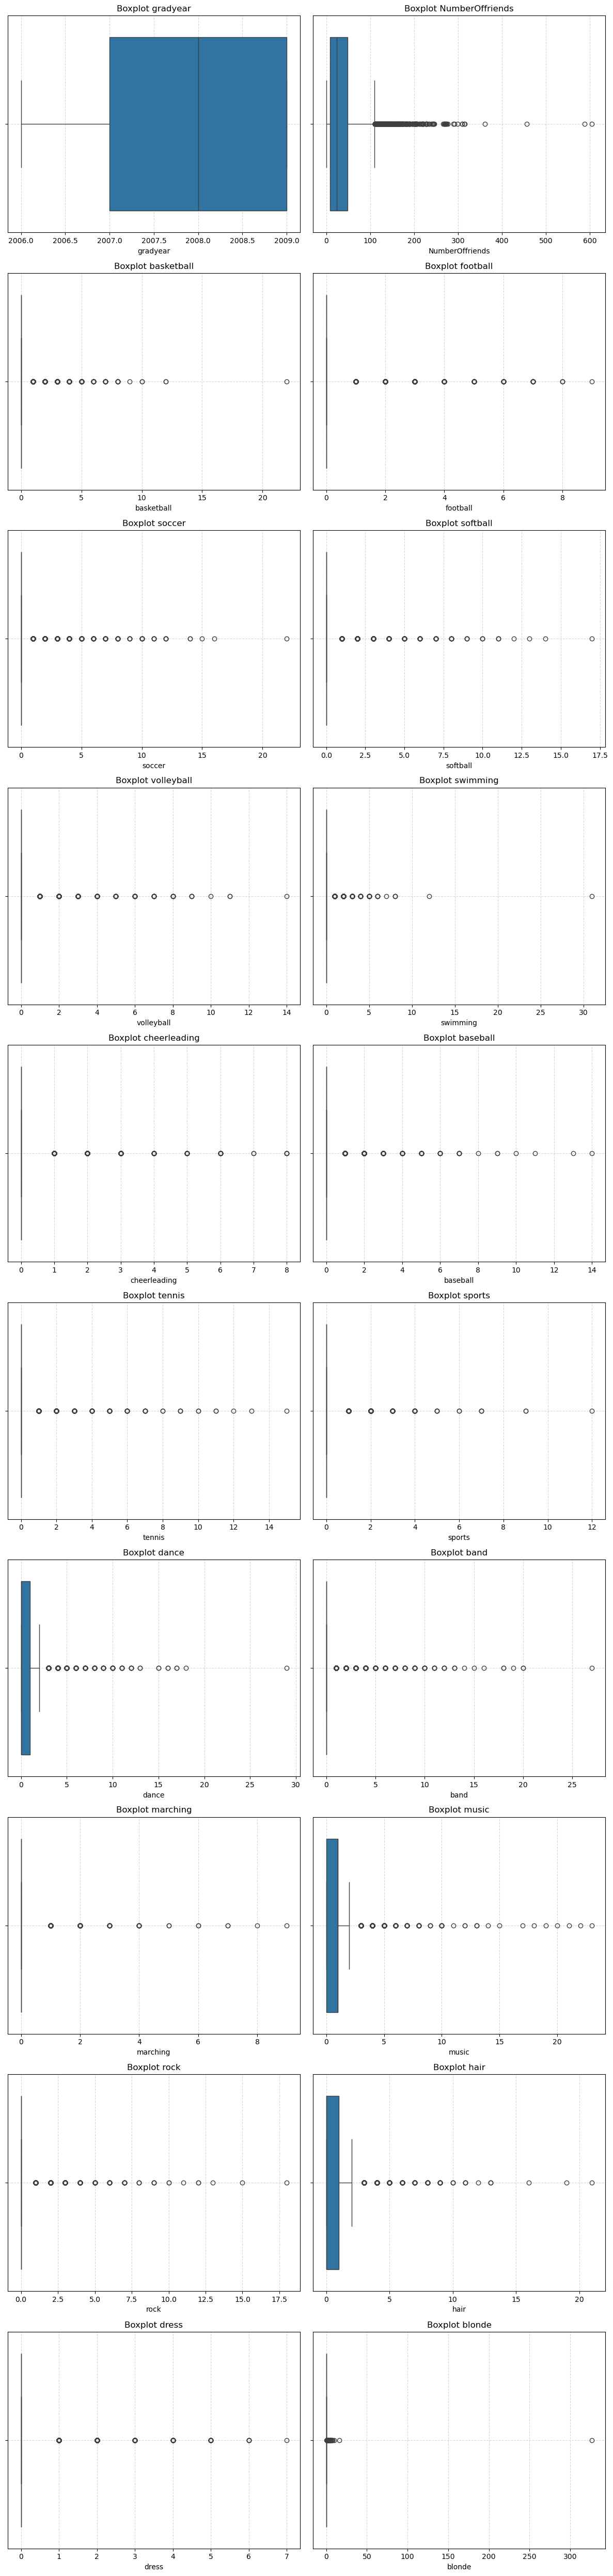

In [70]:
# Ambil semua kolom integer
int_cols = df_clean.select_dtypes(include=['int64', 'int32']).columns

# Tentukan jumlah kolom
n_cols = len(int_cols)

# Tentukan jumlah baris (2 plot per baris)
n_rows = math.ceil(n_cols / 2)

# Buat subplot
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))

# Ubah axes jadi 1D array supaya mudah di-loop
axes = axes.flatten()

# Loop untuk membuat boxplot tiap kolom
for i, col in enumerate(int_cols):
    sns.boxplot(x=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hapus subplot kosong jika jumlah kolom ganjil
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Dari hasil pengecekan menggunakan metode IQR dan boxplot, ditemukan beberapa nilai yang terlihat sangat tinggi atau sangat rendah dibandingkan data lainnya.

Namun, dalam konteks data jejaring sosial, hal tersebut masih wajar. Setiap siswa memiliki karakter dan tingkat aktivitas yang berbeda-beda. Ada siswa yang memiliki banyak teman, ada yang sedikit, bahkan ada yang tidak memiliki teman. Begitu juga dengan minat, ada siswa yang menuliskan banyak minat, dan ada yang tidak menuliskan sama sekali.

Karena nilai-nilai tersebut masih masuk akal dan bukan merupakan kesalahan, maka data tersebut tidak dihapus. Outlier tetap dipertahankan agar variasi dan kondisi nyata dari setiap siswa tetap tergambarkan dalam analisis.

In [94]:
df_clean.to_excel('StudentsSocialNetwork.xlsx', index=False)

# Data Manipulation

In [72]:
# Daftar kolom minat/hobi
interest_cols = [
    'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming',
    'cheerleading', 'baseball', 'tennis', 'sports', 'dance', 'band',
    'marching', 'music', 'rock', 'hair', 'dress', 'blonde'
]

# Buat kolom total_minat: jumlah seluruh minat yang disebut
df_clean['total_minat'] = df_clean[interest_cols].sum(axis=1)

In [73]:
df_clean.head()

,gradyear,gender,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,sports,dance,band,marching,music,rock,hair,dress,blonde,total_minat
0,2007,Unknown,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,49,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
2,2007,F,41,0,0,0,0,0,0,0,...,0,0,0,0,1,2,4,0,0,8
3,2006,F,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,5,0,0,10


Rata-Rata Teman Berdasarkan Jumlah Minat

In [75]:
grouped = df_clean.groupby('total_minat')['NumberOffriends'].mean().reset_index()
grouped

,total_minat,NumberOffriends
0,0,46.165957
1,1,34.977356
2,2,30.387568
3,3,31.929198
4,4,34.120871
5,5,31.735553
6,6,32.155172
7,7,35.136966
8,8,38.778013
9,9,39.028205


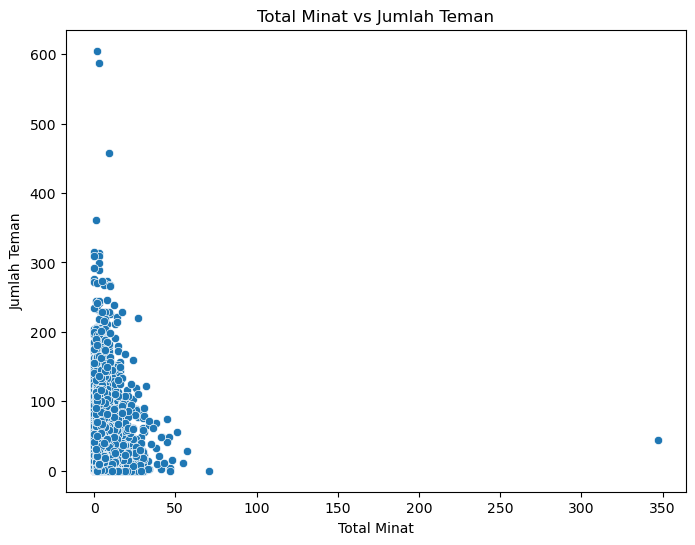

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='total_minat', y='NumberOffriends', data=df_clean)
plt.title('Total Minat vs Jumlah Teman')
plt.xlabel('Total Minat')
plt.ylabel('Jumlah Teman')
plt.show()


In [78]:
for col in interest_cols:
    print(f"\nMinat: {col}")
    print(df_clean.groupby(col)['NumberOffriends'].mean())



Minat: basketball
basketball
0     34.065811
1     35.640770
2     33.435361
3     35.213115
4     33.530864
5     40.833333
6     49.461538
7     43.615385
8     40.000000
9     19.000000
10    92.500000
12    24.500000
22     2.000000
Name: NumberOffriends, dtype: float64

Minat: football
football
0    34.275462
1    34.816388
2    34.165669
3    34.195531
4    29.181818
5    31.461538
6    26.800000
7    44.818182
8    43.333333
9     0.000000
Name: NumberOffriends, dtype: float64

Minat: soccer
soccer
0     34.454459
1     32.889831
2     30.996721
3     37.633588
4     37.057692
5     43.673469
6     31.194444
7     26.600000
8     25.785714
9     26.600000
10    38.625000
11    51.800000
12    12.800000
14    19.000000
15    17.000000
16     4.000000
22    50.000000
Name: NumberOffriends, dtype: float64

Minat: softball
softball
0     33.876185
1     37.629412
2     38.752066
3     37.790000
4     40.508197
5     36.735294
6     43.107143
7     46.375000
8     32.777778
9     44

# Encoding

In [80]:
df_raw = df_clean.copy()

In [83]:
encoding = [   # kolom kategorikal yang akan di encoding
    'gender'
]


label_encoders = {} # Membuat dictionary untuk menyimpan objek LabelEncoder untuk tiap kolom

for col in encoding:
    le = LabelEncoder() # Membuat instance LabelEncoder baru
    df_raw[col] = le.fit_transform(df_raw[col])
    label_encoders[col] = le   # Menyimpan LabelEncoder di dictionary supaya bisa memeriksa mapping label seperti kategori label 1 itu apa


In [84]:
non_encoding = [
    'gradyear',
    'NumberOffriends',
    'basketball',
    'football',
    'soccer',
    'softball',
    'volleyball',
    'swimming',
    'cheerleading',
    'baseball',
    'tennis',
    'sports',
    'dance',
    'band',
    'marching',
    'music',
    'rock',
    'hair',
    'dress',
    'blonde'
]


In [85]:
df_final = df_raw[non_encoding + encoding]
df_final.head()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,sports,dance,band,marching,music,rock,hair,dress,blonde,gender
0,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2007,49,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2007,41,0,0,0,0,0,0,0,1,...,0,0,0,0,1,2,4,0,0,0
3,2006,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,5,0,0,0


In [86]:
for col, le in label_encoders.items():
    print(f"\nKolom: {col}") # Menampilkan nama kolom yang sedang dicek
    label_mapping = pd.DataFrame({ # Membuat tabel dataframe untuk melihat mapping antara angka hasil labeling dan kategori asli
        'Label': le.transform(le.classes_), # Mengubah kategori asli ke angka sesuai encoder
        'Kategori_Asli': le.classes_  # Menampilkan kategori asli 
    })
    print(label_mapping)



Kolom: gender
   Label Kategori_Asli
0      0             F
1      1             M
2      2       Unknown


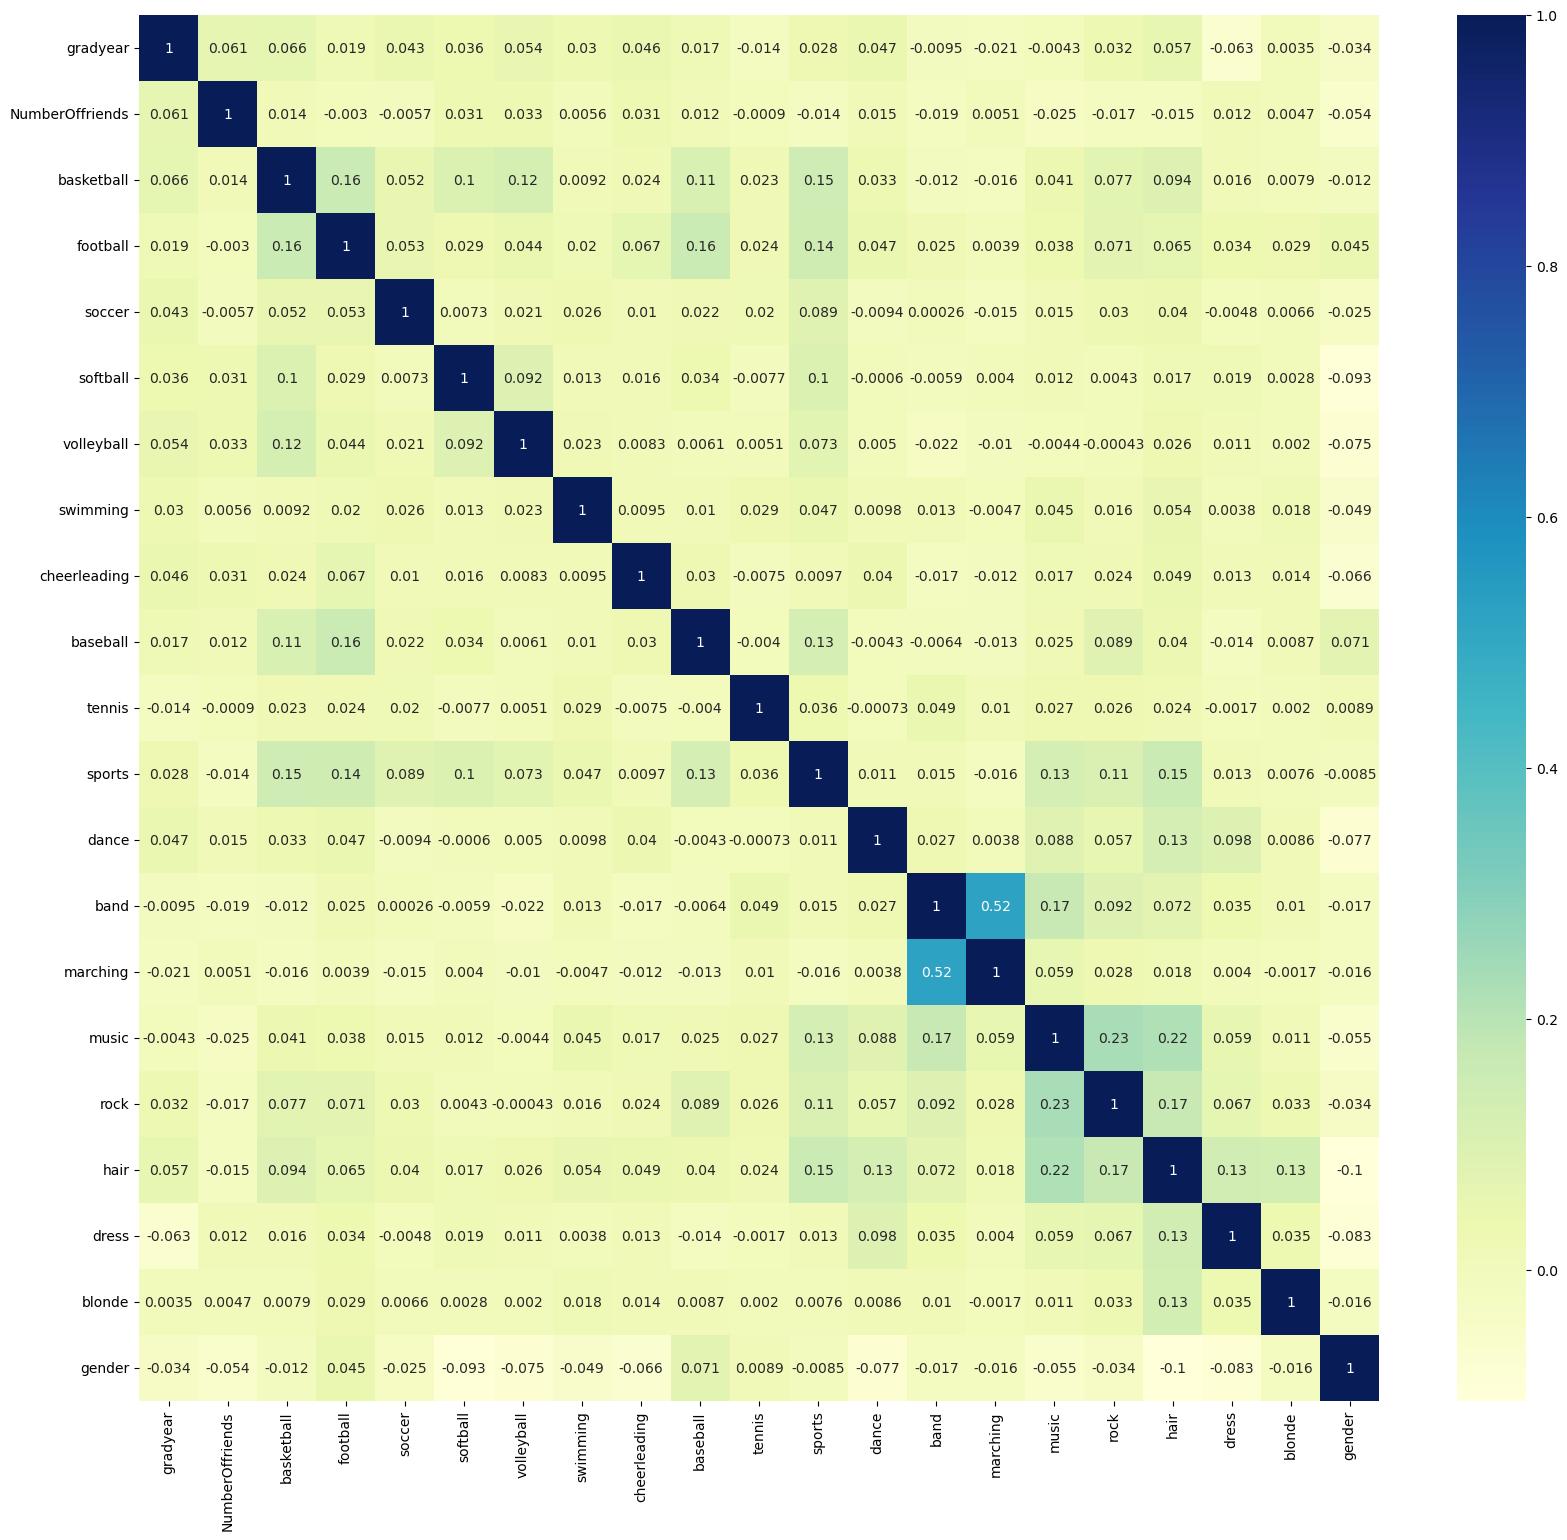

In [88]:
plt.figure(figsize=(20, 18))

# Hitung matriks korelasi
co_mtx = df_final.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Menampilkan heatmap
plt.show()